In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

Importo il dataset → Iris

In [ ]:
#altro metodo (importo il file .csv dal pc)
#from google.colab import files 
#uploaded = files.upload()
#import io
#df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
#print(df)

import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Divido in due parti

In [ ]:
X=iris.iloc[:,0:4]  #prime quattro colonne
Y=iris['species'] #quinta colonna

Trasformo in vettore

In [ ]:
iris['species'].unique()
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33, random_state=42)

Definisco la mia rete neurale (il modello della rete)

In [ ]:
#create model
model = Sequential()
#manca lo strato di input
model.add(Dense(16, input_dim=4, activation='relu')) #primo strato nascosto
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))#strato di output
#Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Alleno la mia rete

In [ ]:
progress = model.fit(X, dummy_y, validation_split=0.33, batch_size=4, epochs=5, shuffle=True)

Epoch 1/5
25/25 [==============================] - 1s 21ms/step - loss: 0.8998 - accuracy: 0.2664 - val_loss: 3.0974 - val_accuracy: 0.0000e+00
Epoch 2/5
25/25 [==============================] - 0s 3ms/step - loss: 0.7461 - accuracy: 0.5059 - val_loss: 4.5098 - val_accuracy: 0.0000e+00
Epoch 3/5
25/25 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6117 - val_loss: 5.4342 - val_accuracy: 0.0000e+00
Epoch 4/5
25/25 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.5804 - val_loss: 6.0015 - val_accuracy: 0.0000e+00
Epoch 5/5
25/25 [==============================] - 0s 3ms/step - loss: 0.6235 - accuracy: 0.8405 - val_loss: 6.3652 - val_accuracy: 0.0000e+00


Perdita dell'accuratezza (accuracy) 

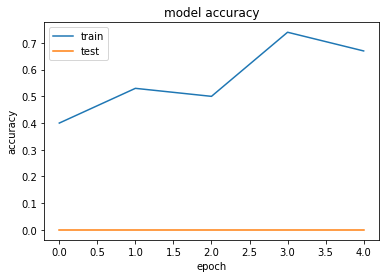

In [ ]:
plt.plot(progress.history['accuracy'])
plt.plot(progress.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Perdita dell'errore (loss)

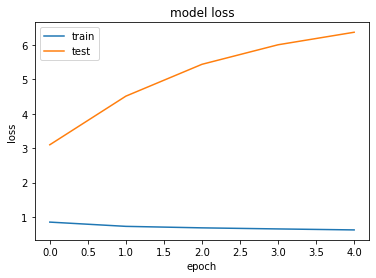

In [ ]:
plt.plot(progress.history['loss'])
plt.plot(progress.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()